In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [258]:
#https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv
'''
This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:
name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner
'''

'\nThis dataset contains information about used cars.\nThis data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.\nThe columns in the given dataset are as follows:\nname\nyear\nselling_price\nkm_driven\nfuel\nseller_type\ntransmission\nOwner\n'

In [259]:
dataset=pd.read_csv('/content/car data.csv')

In [260]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [261]:
dataset.shape

(301, 9)

In [262]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [263]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [264]:
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [265]:
#ML MODEL CANNOT UNDERSTAND NUMERICAL VALUES SO WE NEED TO CONVERT
#TEXTUAL/CATEGORICAL VALUES TO NUMERICAL VALUES.

In [266]:
#ENCODING THE CATEGORICAL DATA

In [267]:
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [268]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [269]:
X=dataset.drop(['Car_Name','Selling_Price'],axis=1)
#Car_Name is removed as it is of no use.
Y=dataset['Selling_Price']

In [270]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [271]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [272]:
#model training

In [273]:
#LINEAR REGRESSION

In [274]:
lin_reg=LinearRegression()

In [275]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [276]:
#MODEL EVALUATION

In [277]:
training_data_prediction=lin_reg.predict(X_train)

In [278]:
#R SQUARED ERROR
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R SQUARED ERROR: ",error_score)

R SQUARED ERROR:  0.8838169193709796


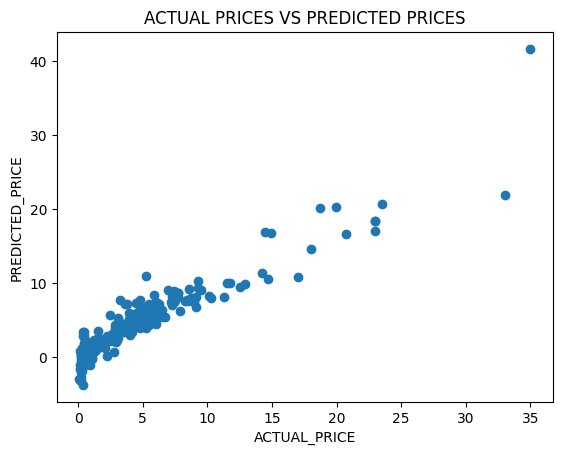

In [279]:
#VISUALIZE THE ACTUAL PRICES AND PREDICTED PRICES
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("ACTUAL_PRICE")
plt.ylabel("PREDICTED_PRICE")
plt.title("ACTUAL PRICES VS PREDICTED PRICES")
plt.show()

In [280]:
#FROM ABOVE GRAPH WE SEE THAT MOST OF THE VALUES ARE CLOSER TO EACH OTHER.
#AS PRICE INCREASES THE DISTANCE OR GAP BETWEEN POINTS INCREASE.

In [281]:
#PREDICTION FOR TEST_DATA
test_data_prediction=lin_reg.predict(X_test)

In [282]:
#R SQUARED ERROR
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R SQUARED ERROR: ",error_score)

R SQUARED ERROR:  0.8401532365377697


In [283]:
#AS R^2 VALUE IS LESS IN THIS CASE HENCE MODEL PERFORMANCE IS GOOD.

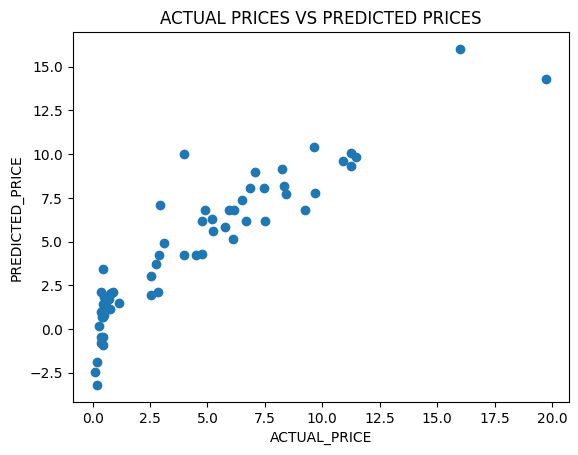

In [284]:
#FOR TEST DATA
#VISUALIZE THE ACTUAL PRICES AND PREDICTED PRICES
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("ACTUAL_PRICE")
plt.ylabel("PREDICTED_PRICE")
plt.title("ACTUAL PRICES VS PREDICTED PRICES")
plt.show()

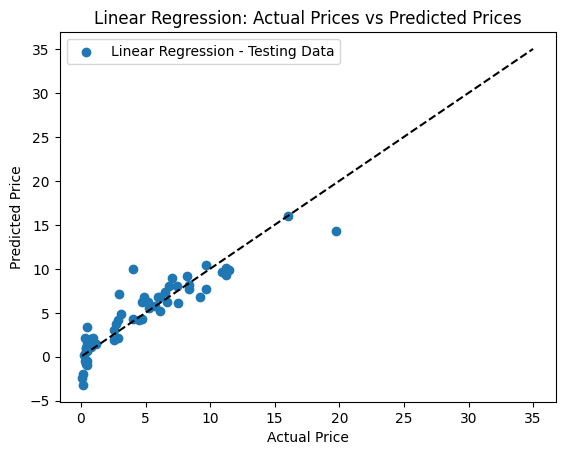

In [285]:
plt.scatter(Y_test, test_data_prediction, label='Linear Regression - Testing Data')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual Prices vs Predicted Prices")
plt.legend()
plt.show()

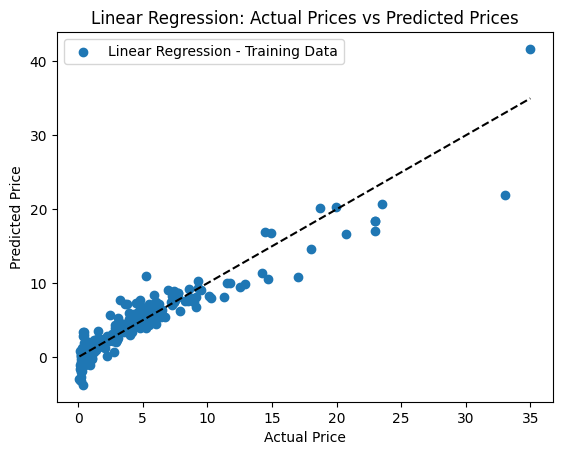

In [286]:
plt.scatter(Y_train, training_data_prediction, label='Linear Regression - Training Data')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual Prices vs Predicted Prices")
plt.legend()
plt.show()

In [287]:
#HERE ALSO THERE IS NOT MUCH DISTANCE BETWEEN POINTS.

In [288]:
#LASSO REGRESSION
#LINEAR REGRESSION WORKS WELL ON THE CASES WHICH ARE LINEARLY CORRELATED OR
#POSITIVELY CORRELATED.
#IN OTHER CASES OTHER TYPES OF REGRESSIONS SUCH AS LASSO REGRESSION, XGBOOST REGRESSOR
#ETC WORK WELL.

In [289]:
lasso_reg=Lasso()

In [290]:
lasso_reg.fit(X_train,Y_train)

Lasso()

In [291]:
#PREDICTION ON TRAINING DATA
training_data_prediction=lasso_reg.predict(X_train)

In [292]:
#R SQUARED ERROR
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('R SQUARED ERROR: ',error_score)

R SQUARED ERROR:  0.843587395258283


In [293]:
#PREDICTION ON TEST DATA
test_data_prediction=lasso_reg.predict(X_test)

In [294]:
#R SQUARED ERROR
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R SQUARED ERROR: ',error_score)

R SQUARED ERROR:  0.8497457570738539


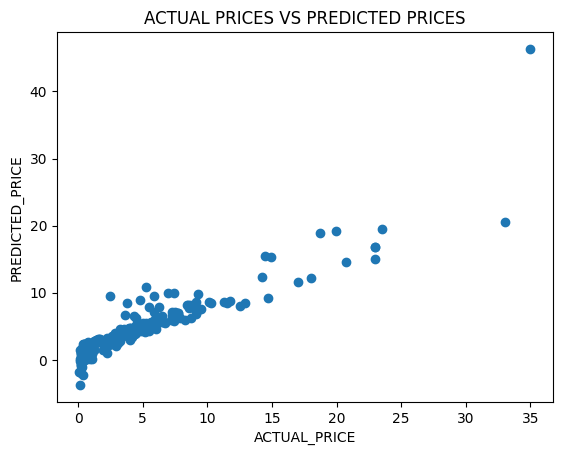

In [295]:
#FOR TRAINING DATA
#VISUALIZE THE ACTUAL PRICES AND PREDICTED PRICES
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("ACTUAL_PRICE")
plt.ylabel("PREDICTED_PRICE")
plt.title("ACTUAL PRICES VS PREDICTED PRICES")
plt.show()

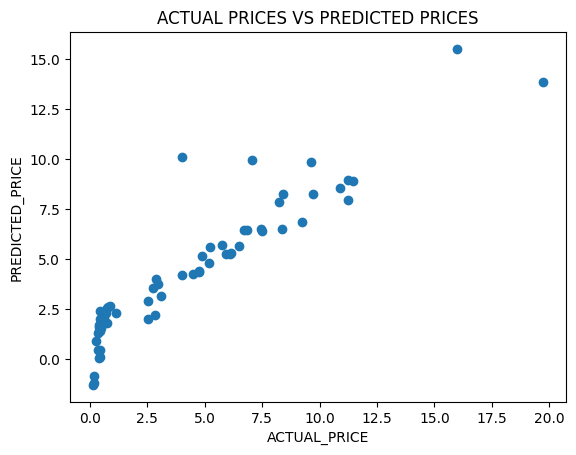

In [296]:
#FOR TEST DATA
#VISUALIZE THE ACTUAL PRICES AND PREDICTED PRICES
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("ACTUAL_PRICE")
plt.ylabel("PREDICTED_PRICE")
plt.title("ACTUAL PRICES VS PREDICTED PRICES")
plt.show()

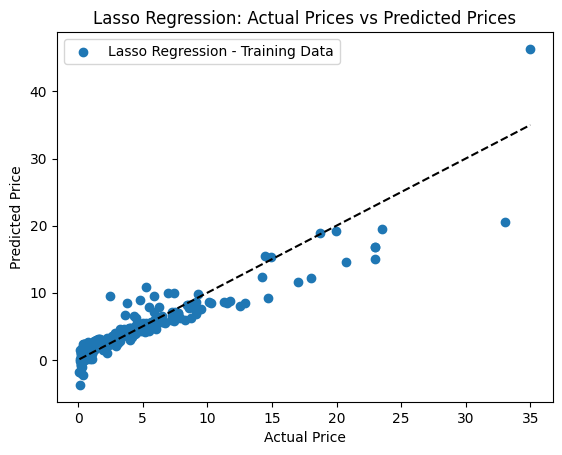

In [297]:
plt.scatter(Y_train, training_data_prediction, label='Lasso Regression - Training Data')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression: Actual Prices vs Predicted Prices")
plt.legend()
plt.show()

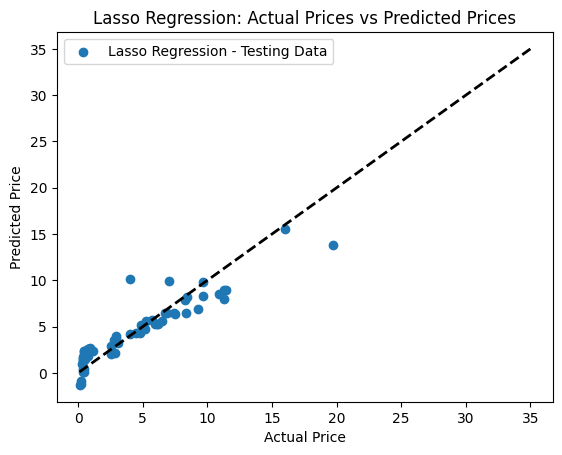

In [298]:
plt.scatter(Y_test, test_data_prediction, label='Lasso Regression - Testing Data')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=2)  # Regression line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression: Actual Prices vs Predicted Prices")
plt.legend()
plt.show()

In [299]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#torch.nn package from pytorch is used for building neural network
#torch.optim for optimizer such as SGD
#Difference between Stochastic Gradient Descent And Gradient Descent
#GD use average of the whole dataset
#SGD uses random sample of data hence take more time and is erratic.

In [300]:
data = pd.read_csv("car data.csv")

In [301]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [302]:
X = data[['Present_Price']].values
y = data['Selling_Price'].values

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [304]:
#TRANSFORMING THE DATA INTO PYTORCH TENSORS.
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
#.view(-1,-1) to reshape into the same size.
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [305]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)
#nn.Linear() initializes weights and biases automatically

In [306]:
#training the model using gradient descent
def train_model(model, X_train, y_train, epochs=1000, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    losses = []
    for epoch in range(epochs):
        # Forward pass
        y_pred = model(X_train)
        # Compute loss
        loss = criterion(y_pred, y_train)
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    return losses
#nn.MSELoss() helps to measure thee error of mean squared format i.e. L2 normalization squared.
#optimizer.step() to perform update.
#optimizer.zero_grad() to reset gradient to zero.
#loss.item() returns actual value stored in loss tensor.

In [307]:
X_train.shape

(240, 1)

In [308]:
input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim)
train_losses = train_model(model, X_train_tensor, y_train_tensor)

Epoch [100/1000], Loss: 6.4554
Epoch [200/1000], Loss: 6.4435
Epoch [300/1000], Loss: 6.4341
Epoch [400/1000], Loss: 6.4265
Epoch [500/1000], Loss: 6.4205
Epoch [600/1000], Loss: 6.4158
Epoch [700/1000], Loss: 6.4120
Epoch [800/1000], Loss: 6.4090
Epoch [900/1000], Loss: 6.4066
Epoch [1000/1000], Loss: 6.4047


In [309]:
def evaluate_model(model, X_test, y_test):
    criterion = nn.MSELoss()
    with torch.no_grad():
        y_pred = model(X_test)
        test_loss = criterion(y_pred, y_test)
        print(f'Test Loss: {test_loss.item():.4f}')
    return y_pred
#forward pass or forward function computes output tensors from input tensors.
#backward function receives gradient of output tensors w.r.to some scalar value
#and computes the gradient of input tensors w.r.to that same sclar value.
#torch.no_grad() sets required grad to false.
#zero_grad() to clear out gradients of all parameters the optimizers is tracking.

In [310]:
y_pred_test = evaluate_model(model, X_test_tensor, y_test_tensor)

Test Loss: 3.7349


In [311]:
#R-squared error
r2_test = r2_score(y_test, y_pred_test.numpy())

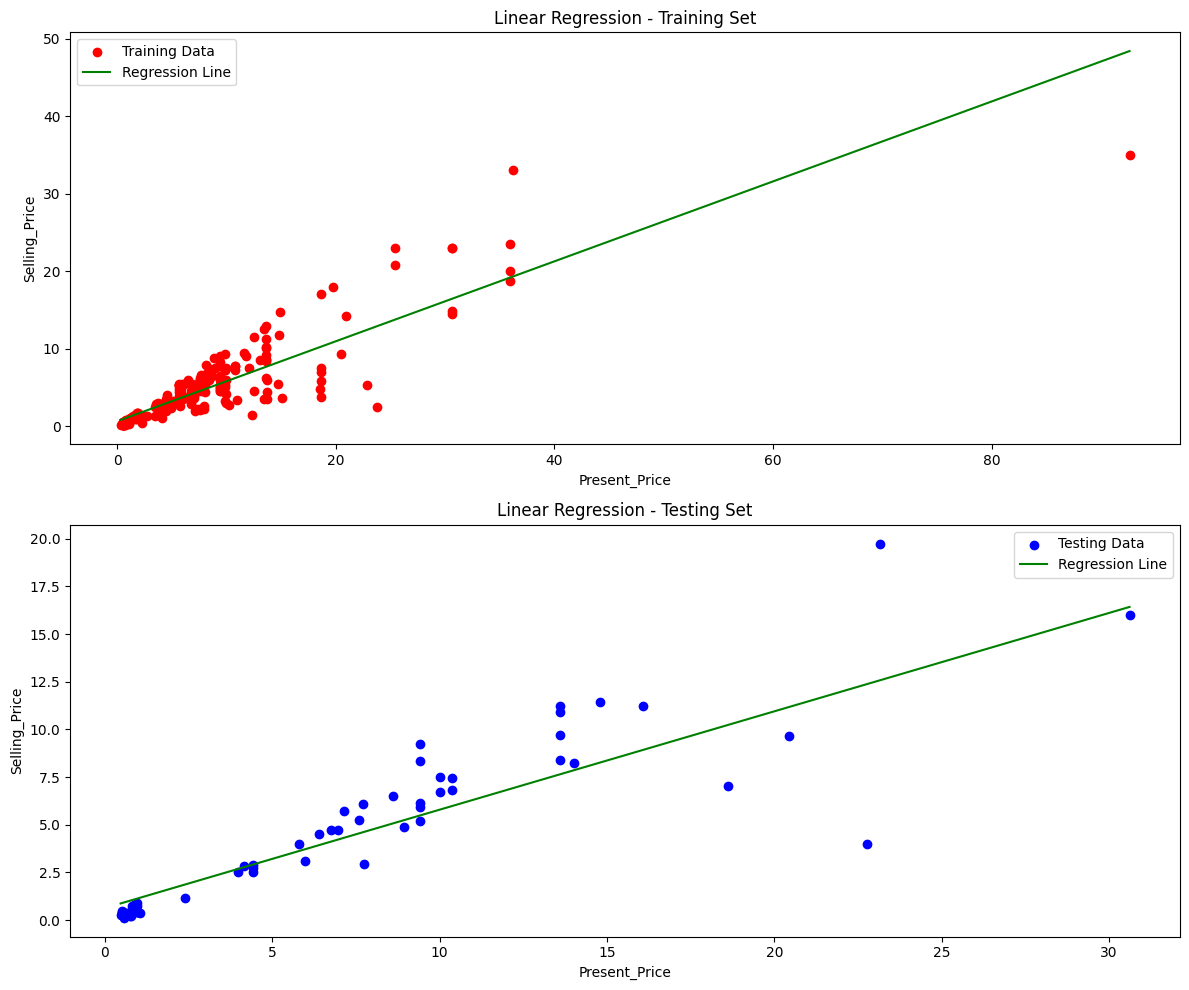

R-squared error on testing set: 0.7966


In [312]:
with torch.no_grad():
    all_predictions_train = model(torch.tensor(X_train, dtype=torch.float32)).numpy()
    all_predictions_test = model(torch.tensor(X_test, dtype=torch.float32)).numpy()

sorted_indices_train = X_train[:, 0].argsort()
sorted_indices_test = X_test[:, 0].argsort()
#numpy.argsort() returns indices that would sort an array
#x=np.array([3,1,2])
#np.argsort(x)
#o/p:-> array([1,2,0])

plt.figure(figsize=(12, 10))
#training data
plt.subplot(2, 1, 1)
plt.scatter(X_train[:, 0], y_train, color='red', label='Training Data')
plt.plot(X_train[:, 0][sorted_indices_train], all_predictions_train[sorted_indices_train], color='green', label='Regression Line')
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.title('Linear Regression - Training Set')
plt.legend()
#testing data
plt.subplot(2, 1, 2)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Testing Data')
plt.plot(X_test[:, 0][sorted_indices_test], all_predictions_test[sorted_indices_test], color='green', label='Regression Line')
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.title('Linear Regression - Testing Set')
plt.legend()
plt.tight_layout()
plt.show()
print(f'R-squared error on testing set: {r2_test:.4f}')

In [313]:
#The lesser the R^2 error value the better is the model.
#By pytorch the R^2 error value is lesser than that from Linear regression and the Lasso regression model.
#so Pytorch performs better than sklearn.

In [314]:
#We referred: https://jovian.ai/aakashns/02-linear-regression